## 1) Library & Data Import

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import warnings
# warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/yoonkt200/FastCampusDataset/master/BostonHousing2.csv")

In [3]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,Swampscott,-70.950,42.2875,21.6,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,Swampscott,-70.936,42.2830,34.7,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,Marblehead,-70.928,42.2930,33.4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,Marblehead,-70.922,42.2980,36.2,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


#### Feature Description
- TOWN : 지역 이름
- LON, LAT : 위도, 경도 정보
- **CMEDV : 해당 지역의 집값(중간값)**
- CRIM : 근방 범죄율
- ZN : 주택지 비율
- INDUS : 상업적 비즈니스에 활용되지 않는 농지 면적
- CHAS : 경계선에 강에 있는지 여부
- NOX : 산화 질소 농도
- RM : 자택당 평균 방 갯수
- AGE : 1940 년 이전에 건설된 비율
- DIS : 5 개의 보스턴 고용 센터와의 거리에 다른 가중치 부여
- RAD : radial 고속도로와의 접근성 지수
- TAX : 10000달러당 재산세
- PTRATIO : 지역별 학생-교사 비율
- B : 지역의 흑인 지수 (1000(B - 0.63)^2), B는 흑인의 비율.
- LSTAT : 빈곤층의 비율

-----

## 2) EDA (Exploratory Data Analysis : 탐색적 데이터 분석)

### 2-1) 회귀 분석 종속(목표) 변수 탐색

##### 데이터셋 기본 정보 탐색

In [4]:
# 크기탐색
df.shape

(506, 17)

In [5]:
# 결측치 탐색
df.isnull().sum()

TOWN       0
LON        0
LAT        0
CMEDV      0
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [6]:
# 타입 탐색
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   TOWN     506 non-null    object 
 1   LON      506 non-null    float64
 2   LAT      506 non-null    float64
 3   CMEDV    506 non-null    float64
 4   CRIM     506 non-null    float64
 5   ZN       506 non-null    float64
 6   INDUS    506 non-null    float64
 7   CHAS     506 non-null    int64  
 8   NOX      506 non-null    float64
 9   RM       506 non-null    float64
 10  AGE      506 non-null    float64
 11  DIS      506 non-null    float64
 12  RAD      506 non-null    int64  
 13  TAX      506 non-null    int64  
 14  PTRATIO  506 non-null    float64
 15  B        506 non-null    float64
 16  LSTAT    506 non-null    float64
dtypes: float64(13), int64(3), object(1)
memory usage: 67.3+ KB


##### 'CMEDV' 피처 탐색

In [7]:
# 다섯수치 요약
df['CMEDV'].describe()

count    506.000000
mean      22.528854
std        9.182176
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: CMEDV, dtype: float64

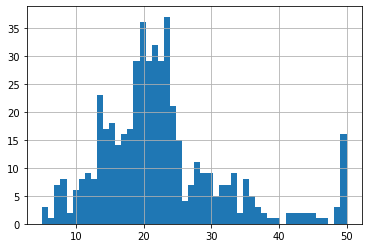

In [8]:
# 히스토그램
df['CMEDV'].hist(bins=50)

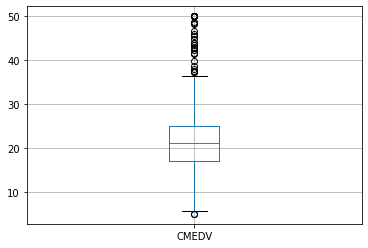

In [9]:
# 박스플롯
df.boxplot(column=['CMEDV'])

-----

### 2-2) 회귀 분석 설명 변수 탐색

##### 설명 변수들의 분포 탐색

ax = plt.gca()

축의 위치를 호출하여 ax로 설정 (축 위치변경을 위해 필요한 과정)

[설명 링크](https://pythonmania.tistory.com/5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  if __name__ == '__main__':


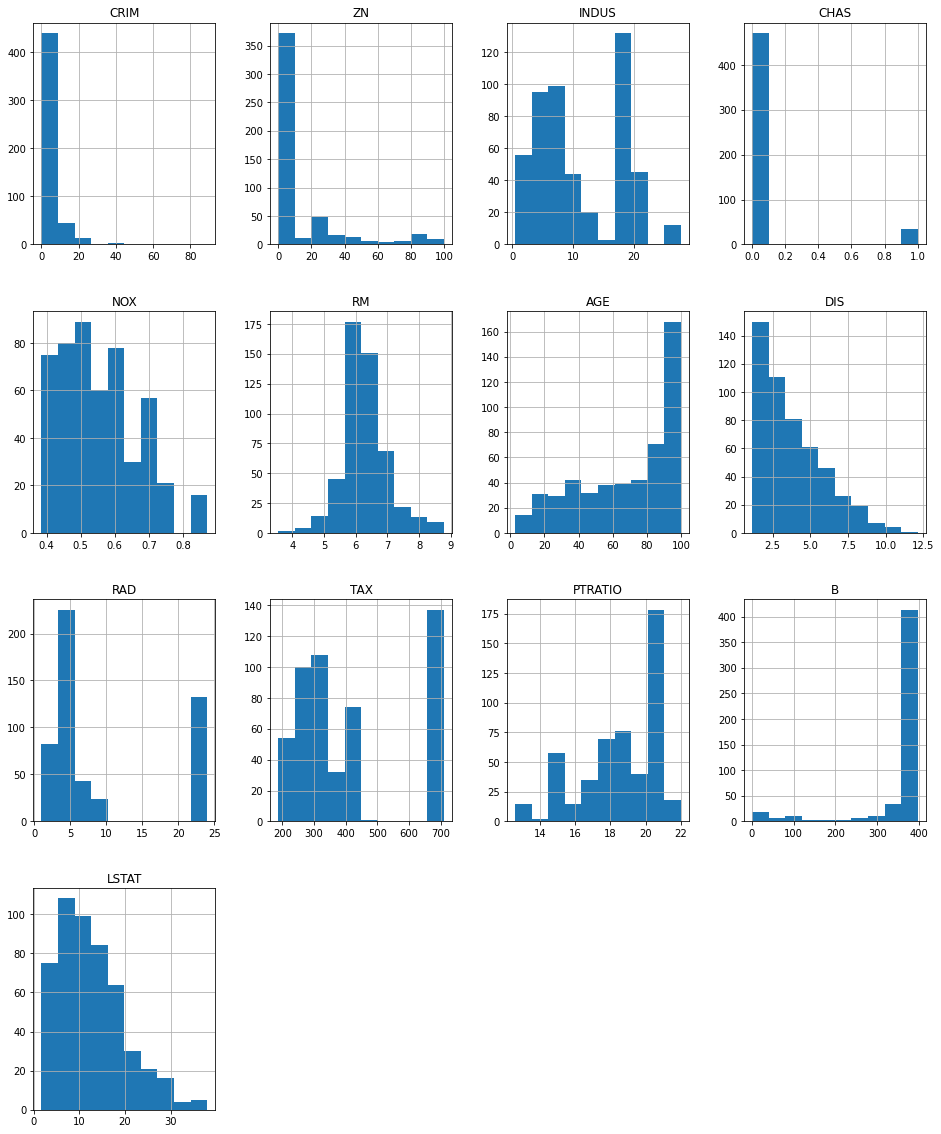

In [10]:
numerical_columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 
                     'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 
                     'B', 'LSTAT']

fig = plt.figure(figsize = (16, 20)) # plt 생성, 크기조절
cur_ax = fig.gca() # gca() 현재 축 가져오기


df[numerical_columns].hist(ax=cur_ax)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8c02c3d910>,
      dtype=object)

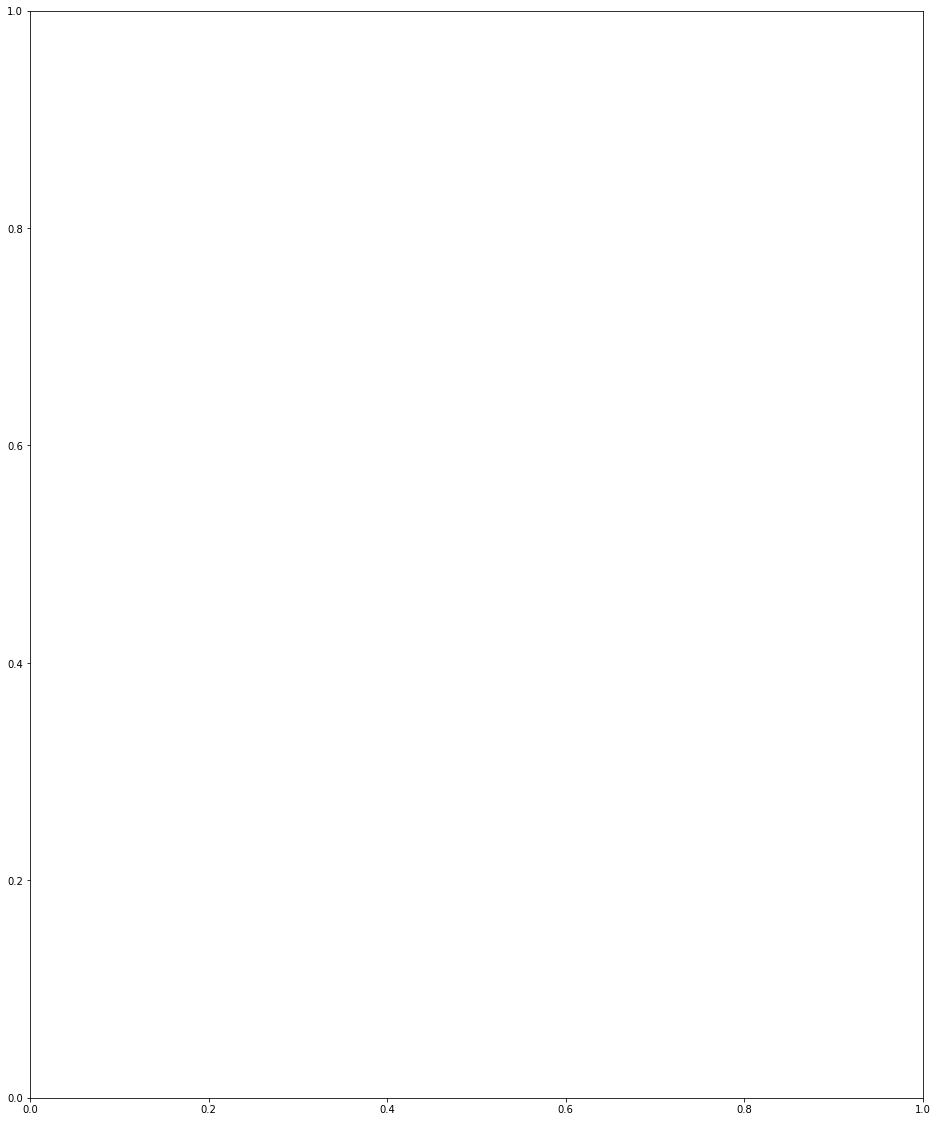

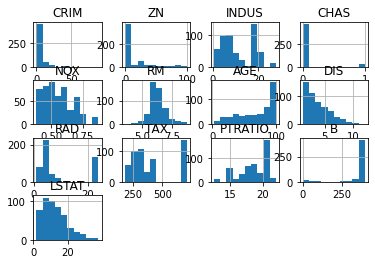

In [11]:
fig = plt.figure(figsize = (16, 20)) # plt 생성, 크기조절
curr_ax = fig.gca() # gca() 현재 축 가져오기

df[numerical_columns].hist() # 현재 축을 가져오지 않으면 망한다
# print(ax)

##### 설명 변수들의 상관관계 탐색

In [12]:
cols = ['CMEDV', 'CRIM', 'ZN', 'INDUS', 
        'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 
        'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
corr = df[cols].corr(method = 'pearson') # 피어슨 상관계수
corr.to_numpy()

array([[ 1.        , -0.38958244,  0.36038618, -0.48475438,  0.17566257,
        -0.42930022,  0.69630379, -0.3779989 ,  0.24931483, -0.38476555,
        -0.47197881, -0.50565462,  0.33486083, -0.74083599],
       [-0.38958244,  1.        , -0.20046922,  0.40658341, -0.05589158,
         0.42097171, -0.2192467 ,  0.35273425, -0.37967009,  0.62550515,
         0.58276431,  0.28994558, -0.38506394,  0.45562148],
       [ 0.36038618, -0.20046922,  1.        , -0.53382819, -0.04269672,
        -0.51660371,  0.31199059, -0.56953734,  0.66440822, -0.31194783,
        -0.31456332, -0.39167855,  0.17552032, -0.41299457],
       [-0.48475438,  0.40658341, -0.53382819,  1.        ,  0.06293803,
         0.76365145, -0.39167585,  0.64477851, -0.70802699,  0.59512927,
         0.72076018,  0.38324756, -0.35697654,  0.60379972],
       [ 0.17566257, -0.05589158, -0.04269672,  0.06293803,  1.        ,
         0.09120281,  0.09125123,  0.08651777, -0.09917578, -0.00736824,
        -0.03558652, -0.12

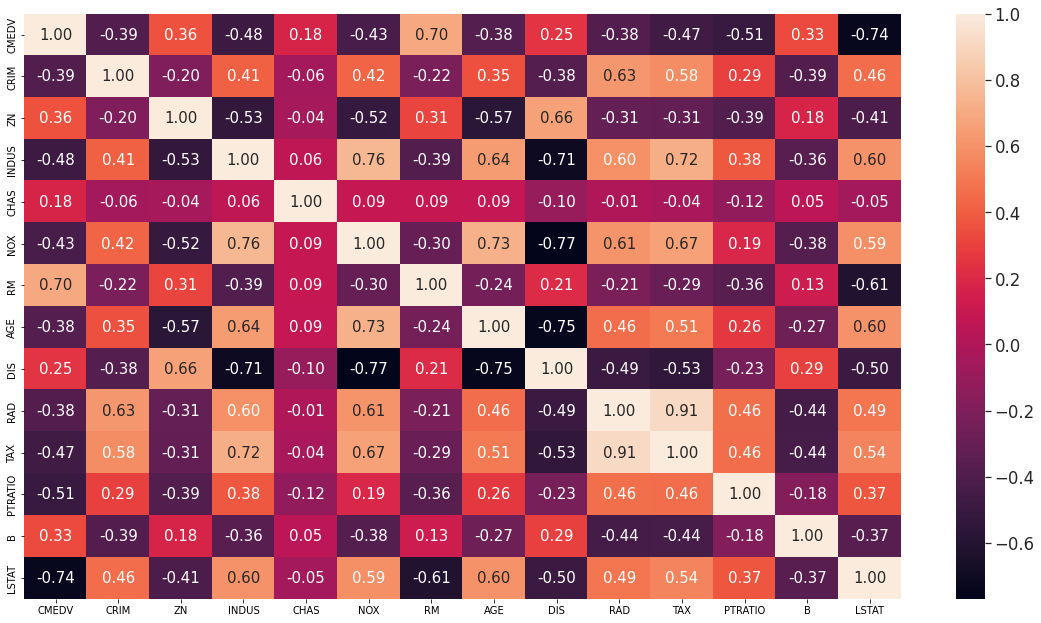

In [13]:
fig = plt.figure(figsize = (16, 9))
curr_ax = fig.gca()

sns.set(font_scale=1.5)
hm = sns.heatmap(corr.to_numpy(), # numpy 2차원 배열
                 annot=True, # 주석 : 각 셀에 데이터값 기록
                 fmt='.2f', # 포멧 형식
                 annot_kws={'size': 15}, # 사이즈 매핑
                 yticklabels=cols, # 참이면 데이터 프레임의 열 이름을 표시합니다
                 xticklabels=cols, # 상동
                 ax=curr_ax)
plt.tight_layout() # Matplotlib에서 서브 플롯간에 올바른 간격을 자동으로 유지
plt.show()

##### 설명 변수와 종속 변수의 관계 탐색

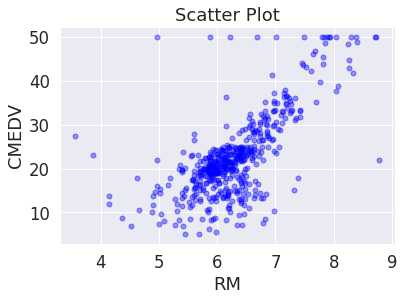

In [14]:
plt.plot('RM', 'CMEDV', 
         data=df,
         linestyle='none', # 디자인
         marker='o', 
         markersize=5,
         color='blue', 
         alpha=0.4) # 투명도
plt.title('Scatter Plot') # 그래프 제목
plt.xlabel('RM') # x축 제목
plt.ylabel('CMEDV') # y축 제목
plt.show()

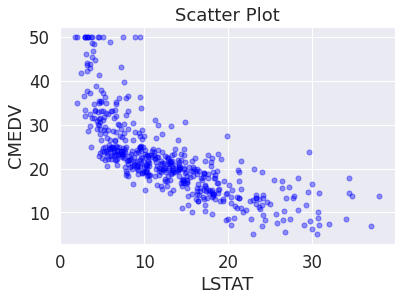

In [15]:
plt.plot('LSTAT', 'CMEDV',
         data=df,
         linestyle='none',
         marker='o',
         markersize=5,
         color='blue',
         alpha=0.4)
plt.title('Scatter Plot')
plt.xlabel('LSTAT')
plt.ylabel('CMEDV')
plt.show()

##### 지역별 차이 탐색

In [16]:
# df.value_counts() : DataFrame의 고유 행 수가 포함된 Series 수를 를 반환
# Series.value_counts() : 고유한 값의 수가 포함된 시리즈를 반환
town = df['TOWN'].value_counts()
print(town)

Cambridge            30
Boston Savin Hill    23
Lynn                 22
Boston Roxbury       19
Newton               18
                     ..
Medfield              1
Dover                 1
Lincoln               1
Sherborn              1
Nahant                1
Name: TOWN, Length: 92, dtype: int64


In [17]:
town_set = set(town)
town_set

{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 15, 18, 19, 22, 23, 30}

In [18]:
len(town_set)

19

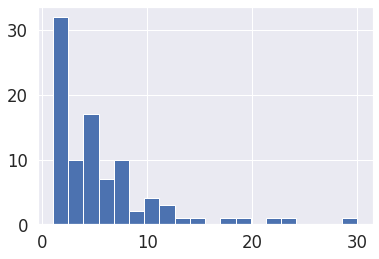

In [19]:
# Series.hist(bins = 가로축의 구간 수(길이 + 1 해야하는 이유)) 
df['TOWN'].value_counts().hist(bins = len(town_set)+1)

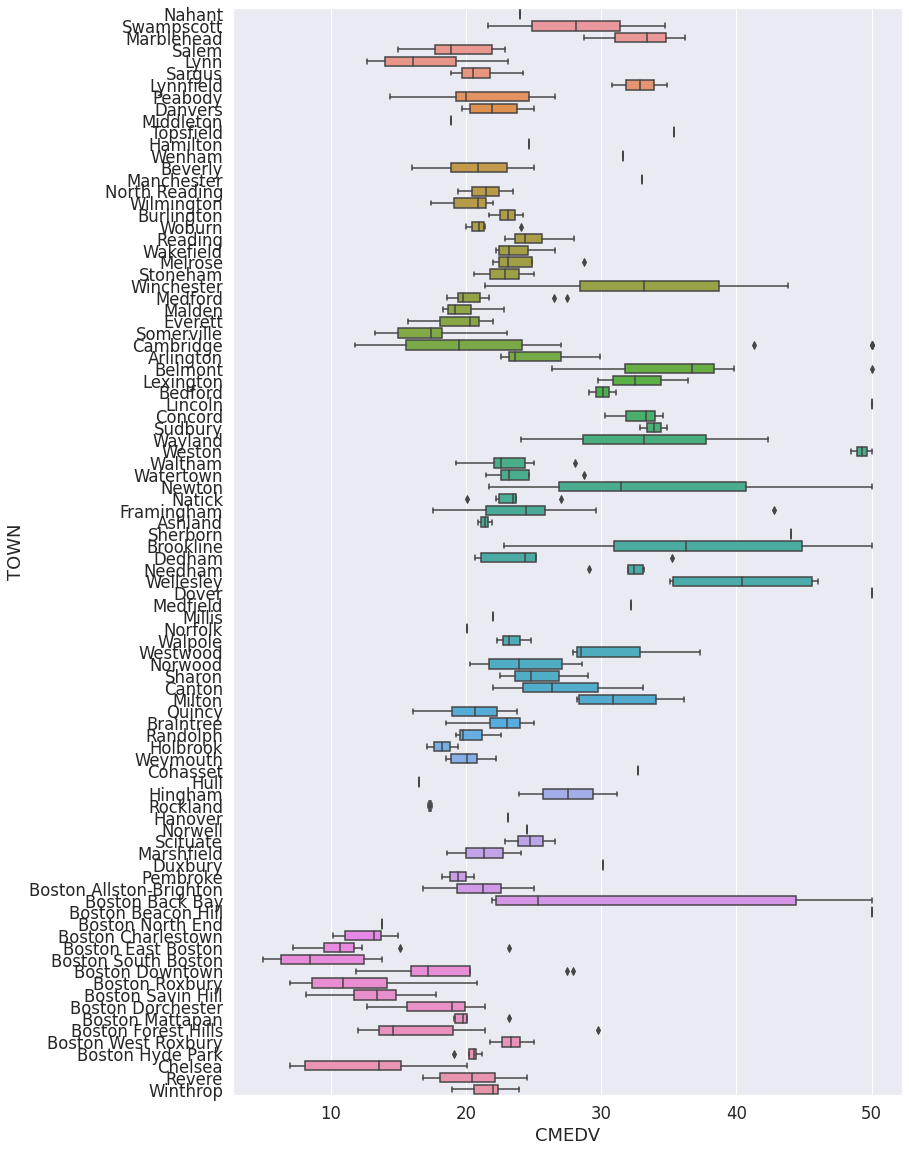

In [20]:
fig = plt.figure(figsize = (12, 20))
ax = fig.gca()
# 상자수염 그림 -> 지역(TOWN)별 해당 집값의 중앙값(CMEDV)
sns.boxplot(x='CMEDV', y='TOWN', data=df, ax=ax)

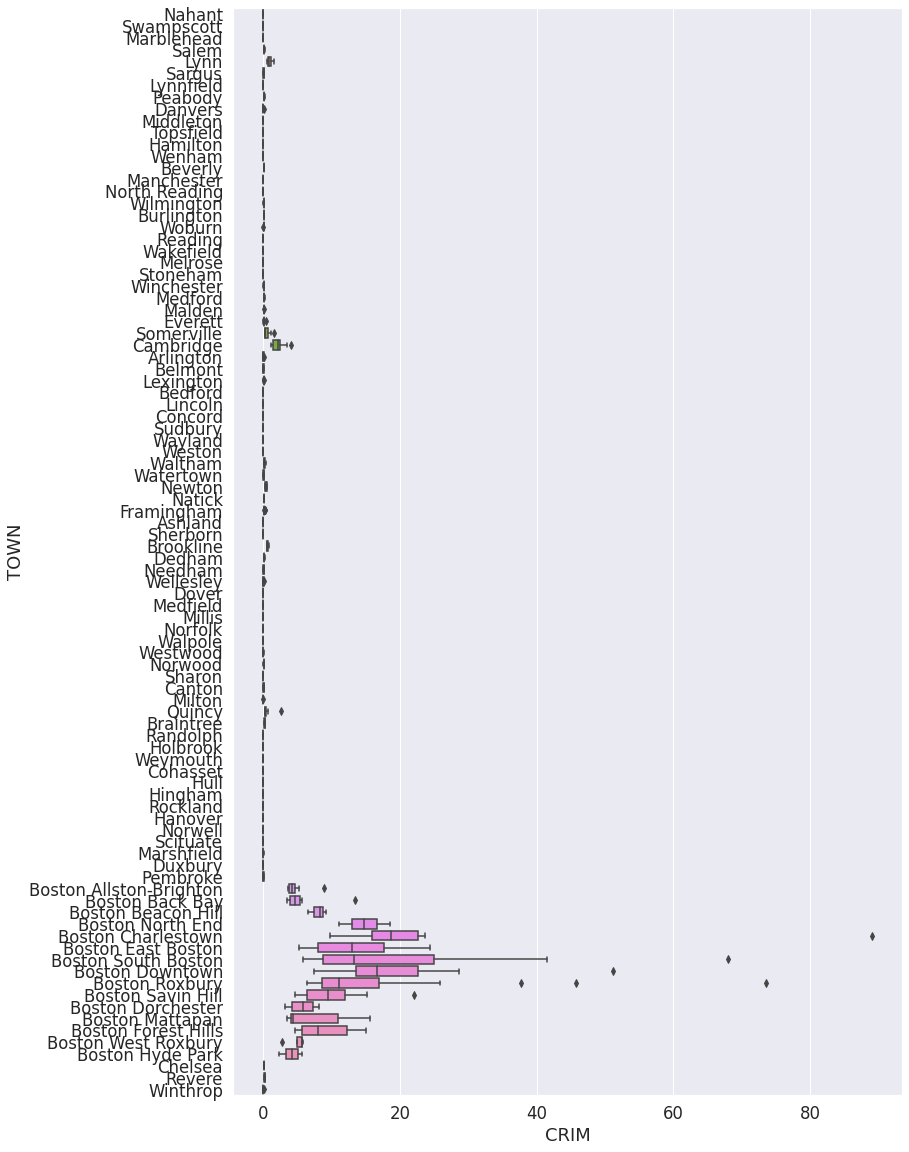

In [21]:
fig = plt.figure(figsize = (12, 20))
ax = fig.gca()
# 범죄율과 집값
sns.boxplot(x='CRIM', y='TOWN', data=df, ax=ax)

-----

## 3) 집값 예측 분석 : 회귀분석

### 3-1) 데이터 전처리

##### 피처 표준화

In [22]:
df.loc[:,'CRIM':'LSTAT'].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [23]:
df.columns[4:]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [24]:
# sklearn.preprocessing.StandardScaler() == DF표준화 패키지
from sklearn.preprocessing import StandardScaler

# feature standardization 독립변수 표준화 z값(평균:0 표준편차:1)
scaler = StandardScaler()

# scale_columns = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
scale_columns = df.columns[4:]
# print(type(scale_columns)) # <class 'pandas.core.indexes.base.Index'>

# fit_transform으로 학습 + 변환 동시에
df[scale_columns] = scaler.fit_transform(df[scale_columns])

In [25]:
# 표준화 확인
df.loc[:,'CRIM':'LSTAT'].head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


##### 데이터셋 분리

In [26]:
df.head()

,TOWN,LON,LAT,CMEDV,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,Nahant,-70.955,42.2550,24.0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,Swampscott,-70.950,42.2875,21.6,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,Swampscott,-70.936,42.2830,34.7,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,Marblehead,-70.928,42.2930,33.4,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,Marblehead,-70.922,42.2980,36.2,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [27]:
from sklearn import linear_model # 선형모델
from sklearn.model_selection import train_test_split # 학습데이터 검증데이터 분리(독립, 종속)
from sklearn.metrics import mean_squared_error # 평균제곱오차
from math import sqrt

# dataset split to train/test
X = df[scale_columns] # 독립
y = df['CMEDV'] # 종속
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

In [28]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(404, 13) (102, 13) (404,) (102,)


-----

### 3-2) 회귀 분석 모델 학습

In [29]:
# train regression model : 모델.fit(독립, 종속)
lr = linear_model.LinearRegression() # 선형회귀
model = lr.fit(X_train, y_train)

# print coef(추정된 회귀 계수 w)
print(lr.coef_)

[-0.95549078  1.18690662  0.22303997  0.76659756 -1.78400866  2.83991455
 -0.05556583 -3.28406695  2.84479571 -2.33740727 -1.77815381  0.79772973
 -4.17382086]


 figure size 바꾸는법 
- 1) Runtime Configuration Parameters, 줄여서 rcParams라는 딕셔너리의 값을 바꾸기
>  plt.rcParams['figure.figsize'] = [12, 16] 
- 2) figure() 함수 사용
> figure(figsize=(12, 6))

140239877152592
140239209131344


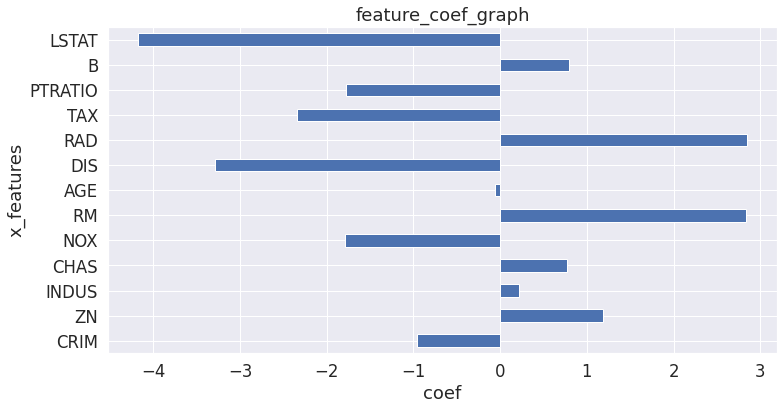

In [30]:
# figure size 바꾸는법 
# plt.rcParams['figure.figsize'] = [12, 16]
plt.figure(figsize=(12, 6)) ; print(id(plt))

# graph values
# coefs = lr.coef_.tolist() # 리스트로
# coefs_series = pd.Series(coefs) # 시리즈로
coefs_series = pd.Series(lr.coef_) # 한번에 바꿔도 상관 x

# graph info
x_labels = scale_columns # ; print(type(x_labels))
ax = coefs_series.plot.barh() ; print(id(ax)) # barh() : 수평막대
ax.set_title('feature_coef_graph') # plt.title('feature_coef_graph')
ax.set_xlabel('coef') # plt.xlabel('X-Axis')
ax.set_ylabel('x_features') # plt.ylabel('Y-Axis')
ax.set_yticklabels(x_labels) # plt.yticklabels(x_labels)
plt.show()

-----

### 3-3) 학습 결과 해석

##### R2 score, RMSE score 계산

In [31]:
# R2 score : 결정계수(설명계수) : 학습된모델.score(독립, 종속)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.7490284664199387
0.7009342135321549


In [32]:
# RMSE score : 평균 제곱근 편차
y_predictions = lr.predict(X_train)
print(sqrt(mean_squared_error(y_train, y_predictions)))

# 모델예측 : 모델.predict(독립)
# MSE : mean_squared_error(종속_훈련or검증, 종속_예측)

y_predictions = lr.predict(X_test)
print(sqrt(mean_squared_error(y_test, y_predictions)))

4.672162734008589
4.614951784913311


In [33]:
y_train.shape

(404,)

##### 피처 유의성 검정

- LinearRegression() 은 모델을 생성할 때, default값이 상수항을 추가하는 것이므로, 단순하게 fit(X, Y) 를 하여도 상수항이 추가되었지만, OLS는 다르다. 
- sm.add_constant -> 상수항을 추가해서 독립변수 행렬을 만들어서 내놓는 함수
- 즉, sm.OLS(Y, X) 인데, 우리는 X 자리에 상수항을 추가한 것을 넣기 위해, sm.add_constant 함수를 사용한 것이다.

- 대부분의 회귀 모형에는 상수 항(즉, "절편")이 포함됩니다. 
- 이렇게 하면 모형이 치우치지 않고, 즉 잔차의 평균이 0이 되기 때문입니다.
- 상수를 포함하면 오류에 대한 자유도가 어느 정도 상실되지만, 편견에 대한 보호를 위해 지불하는 작은 대가입니다.
- 모형에 절편 항이 있으면 기울기 모수의 최소 제곱 추정치가 치우치지 않습니다.

In [34]:
import statsmodels.api as sm # statsmodels 사용하면 OLS사용해서 더 디테일하게 알려줌
print(type(X_train))
X_train.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'pandas.core.frame.DataFrame'>


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
229,-0.369106,-0.487722,-0.720322,-0.272599,-0.437921,0.380905,-1.677566,-0.199628,-0.178120,-0.601276,-0.488039,0.259482,-1.246574
296,-0.414266,-0.487722,0.406098,-0.272599,-1.016689,0.376631,-0.624974,1.029344,-0.637962,-0.708183,-1.135347,0.396646,-0.737743
425,1.425197,-0.487722,1.015999,-0.272599,1.073787,-0.553671,0.953916,-0.896281,1.661245,1.530926,0.806576,-3.826496,1.645211
491,-0.408212,-0.487722,2.422565,-0.272599,0.469104,-0.429726,1.074822,-0.916009,-0.637962,1.798194,0.760340,0.366604,0.759313
418,8.136884,-0.487722,1.015999,-0.272599,1.073787,-0.466767,1.117494,-0.947146,1.661245,1.530926,0.806576,-3.730338,1.116756


In [35]:
# add_constant() : 상수항 결합 (1열에 1을 전부 대입)
X_train = sm.add_constant(X_train)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [36]:
print(type(X_train))
X_train.head()

<class 'pandas.core.frame.DataFrame'>


,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
229,1.0,-0.369106,-0.487722,-0.720322,-0.272599,-0.437921,0.380905,-1.677566,-0.199628,-0.178120,-0.601276,-0.488039,0.259482,-1.246574
296,1.0,-0.414266,-0.487722,0.406098,-0.272599,-1.016689,0.376631,-0.624974,1.029344,-0.637962,-0.708183,-1.135347,0.396646,-0.737743
425,1.0,1.425197,-0.487722,1.015999,-0.272599,1.073787,-0.553671,0.953916,-0.896281,1.661245,1.530926,0.806576,-3.826496,1.645211
491,1.0,-0.408212,-0.487722,2.422565,-0.272599,0.469104,-0.429726,1.074822,-0.916009,-0.637962,1.798194,0.760340,0.366604,0.759313
418,1.0,8.136884,-0.487722,1.015999,-0.272599,1.073787,-0.466767,1.117494,-0.947146,1.661245,1.530926,0.806576,-3.730338,1.116756


In [37]:
model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  CMEDV   R-squared:                       0.749
Model:                            OLS   Adj. R-squared:                  0.741
Method:                 Least Squares   F-statistic:                     89.54
Date:                Thu, 28 Jul 2022   Prob (F-statistic):          2.61e-108
Time:                        20:13:42   Log-Likelihood:                -1196.1
No. Observations:                 404   AIC:                             2420.
Df Residuals:                     390   BIC:                             2476.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.4800      0.238     94.635      0.000      22.013      22.947
CRIM          -0.9555      0.299     -3.192      0.002      -1.544      -0.367
ZN             1.1869      0.353      3.362      0.001       0.493       1.881
INDUS          0.2230      0.470      0.475      0.635      -0.700       1.147
CHAS           0.7666      0.238      3.227      0.001       0.300       1.234
NOX           -1.7840      0.512     -3.482      0.001      -2.791      -0.777
RM             2.8399      0.326      8.723      0.000       2.200       3.480
AGE           -0.0556      0.410     -0.135      0.892      -0.862       0.751
DIS           -3.2841      0.491     -6.695      0.000      -4.248      -2.320
RAD            2.8448      0.650      4.375      0.000       1.566       4.123
TAX           -2.3374      0.717     -3.259      0.001      -3.748      -0.927
PTRATIO       -1.7782      0.312     -5.700      0.000      -2.391      -1.165
B              0.7977      0.293      2.725      0.007       0.222       1.373
LSTAT         -4.1738      0.405    -10.317      0.000      -4.969      -3.378
==============================================================================
Omnibus:                      167.528   Durbin-Watson:                   1.913
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              769.057
Skew:                           1.774   Prob(JB):                    1.00e-167
Kurtosis:                       8.753   Cond. No.                         9.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

##### 다중 공선성

In [38]:
type(X_train)

pandas.core.frame.DataFrame

In [39]:
X_train[0:3]

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
229,1.0,-0.369106,-0.487722,-0.720322,-0.272599,-0.437921,0.380905,-1.677566,-0.199628,-0.178120,-0.601276,-0.488039,0.259482,-1.246574
296,1.0,-0.414266,-0.487722,0.406098,-0.272599,-1.016689,0.376631,-0.624974,1.029344,-0.637962,-0.708183,-1.135347,0.396646,-0.737743
425,1.0,1.425197,-0.487722,1.015999,-0.272599,1.073787,-0.553671,0.953916,-0.896281,1.661245,1.530926,0.806576,-3.826496,1.645211


In [40]:
my = X_train.to_numpy()
my.shape

(404, 14)

In [41]:
my[0:3]

array([[ 1.        , -0.36910605, -0.48772236, -0.72032214, -0.27259857,
        -0.43792065,  0.38090474, -1.67756646, -0.19962779, -0.17812039,
        -0.6012761 , -0.48803915,  0.25948216, -1.24657432],
       [ 1.        , -0.41426585, -0.48772236,  0.40609801, -0.27259857,
        -1.01668877,  0.37663076, -0.62497354,  1.02934404, -0.6379618 ,
        -0.70818319, -1.13534664,  0.39664628, -0.73774349],
       [ 1.        ,  1.42519696, -0.48772236,  1.01599907, -0.27259857,
         1.07378711, -0.55367135,  0.95391585, -0.89628127,  1.66124525,
         1.53092646,  0.80657583, -3.82649563,  1.64521083]])

 VIF가 5보다 크면 exog_idx에 의해 제공된 설명 변수가 다른 설명 변수와 매우 공선적이며 이 때문에 매개변수 추정값에 큰 표준 오차가 있다는 것

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.to_numpy(), i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns
vif.round(1)

,VIF Factor,features
0,1.0,const
1,1.7,CRIM
2,2.2,ZN
3,3.9,INDUS
4,1.1,CHAS
5,4.4,NOX
6,1.9,RM
7,3.1,AGE
8,4.1,DIS
9,6.9,RAD
